Name: Akhil A 
Roll No.: 004 
PRN: 72036135E
Subject: LP-IV(DL)

In [4]:
import tensorflow as tf
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pathlib

In [5]:
Image_Shape = (224,224)

In [6]:
URL_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [7]:
data_dir = tf.keras.utils.get_file(origin=URL_dataset,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 278s 1us/step


In [8]:
# Total images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


### Making the different classes

In [9]:
flowers_images_dict = {
    "daisy" : list(data_dir.glob('daisy/*')),
    "dandelion" : list(data_dir.glob('dandelion/*')),
    "roses" : list(data_dir.glob('roses/*')),
    "sunflowers" : list(data_dir.glob('sunflowers/*')),
    "tulips" : list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_labels_dict= {
    "daisy" : 0,
    "dandelion" : 1,
     "roses" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

### Reshaping Images

In [11]:
X, Y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, Image_Shape)
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])

In [12]:
X = np.array(X)
y = np.array(Y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [43]:
del X_train
del X_test

### Pretrained Model

In [15]:
tf_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [37]:
classifier = tf.keras.Sequential([
    hub.KerasLayer(tf_model,input_shape=(224,224,3), trainable=False),
    tf.keras.layers.Dense(len(flowers_labels_dict), activation="softmax")
])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
classifier.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [39]:
classifier.fit(X_train_scaled, y_train,epochs=5, batch_size=40)

Epoch 1/5
69/69 [==============================] - 13s 112ms/step - loss: 0.8967 - accuracy: 0.6617
Epoch 2/5
69/69 [==============================] - 8s 110ms/step - loss: 0.4508 - accuracy: 0.8448
Epoch 3/5
69/69 [==============================] - 8s 112ms/step - loss: 0.3491 - accuracy: 0.8841
Epoch 4/5
69/69 [==============================] - 8s 111ms/step - loss: 0.2981 - accuracy: 0.9012
Epoch 5/5
69/69 [==============================] - 8s 111ms/step - loss: 0.2546 - accuracy: 0.9190


In [ ]:
classifier.evaluate(X_test_scaled, y_test)

### Prediction

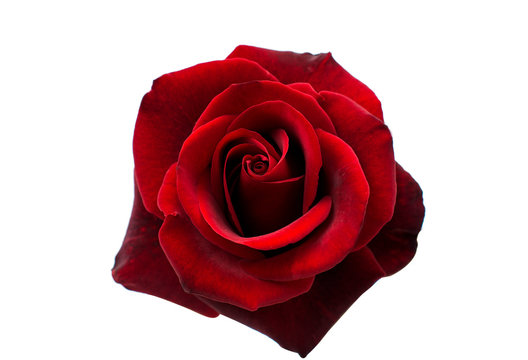

In [45]:
from PIL import Image
img = Image.open("360_F_105573812_cvD4P5jo6tMPhZULX324qUYFbNpXlisD.jpg")
img

In [46]:
img = tf.keras.preprocessing.image.img_to_array(img.resize(Image_Shape))
img = np.array([img])

In [47]:
res = classifier.predict(img)

1/1 [==============================] - 2s 2s/step


In [48]:
print("The prediction is : {}".format(list(flowers_labels_dict.keys())[np.argmax(res)]))

The prediction is : roses
